In [1]:
import pandas as pd
import dask.dataframe as dd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_trx = pd.read_csv('data/DT19_Datos_transaccionales_train_lite.csv', parse_dates=['fecha_trxn'])
train_trx.head(3).append(train_trx.tail(3))

,id,fecha_trxn,canal,disposit,cdgtrn,cdgrpta,vlrtran,sesion
0,1,2018-02-20 14:16:00.211800,CANAL_5,DISPOSIT_4,464,0,0.0,69
1,1,2018-02-20 14:16:00.210600,CANAL_5,DISPOSIT_4,360,0,0.0,69
2,1,2018-02-20 14:16:00.208000,CANAL_5,DISPOSIT_4,491,0,0.0,69
20066309,38000,2016-03-06 17:18:00.194400,CANAL_2,DISPOSIT_11,9916,0,0.0,2
20066310,38000,2016-03-06 17:17:00.186700,CANAL_2,DISPOSIT_5,99,0,0.0,2
20066311,38000,2016-03-06 17:16:00.574700,CANAL_2,DISPOSIT_10,165,0,0.0,1


In [3]:
train_rpa = pd.read_csv('data/DT19_Datos_Var_Rpta_train_lite.csv')
train_rpa.head(3).append(train_rpa.tail(3))

,id,f_analisis,var_rpta,segmento
0,1,201803,0,4
1,2,201604,0,0
2,3,201608,0,5
37997,37998,201602,0,5
37998,37999,201602,0,5
37999,38000,201612,0,5


In [4]:
train_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20066312 entries, 0 to 20066311
Data columns (total 8 columns):
id            int64
fecha_trxn    datetime64[ns]
canal         object
disposit      object
cdgtrn        int64
cdgrpta       int64
vlrtran       float64
sesion        int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.2+ GB


## Valores missing

En la siguiente gráfica se puede observar que no hay valores missing en los datos, sin embargo, es importante revisar la temporalidad de los clientes, es decir, revisar que tan antiguos o nuevos al menos en el último año son estos usuarios.

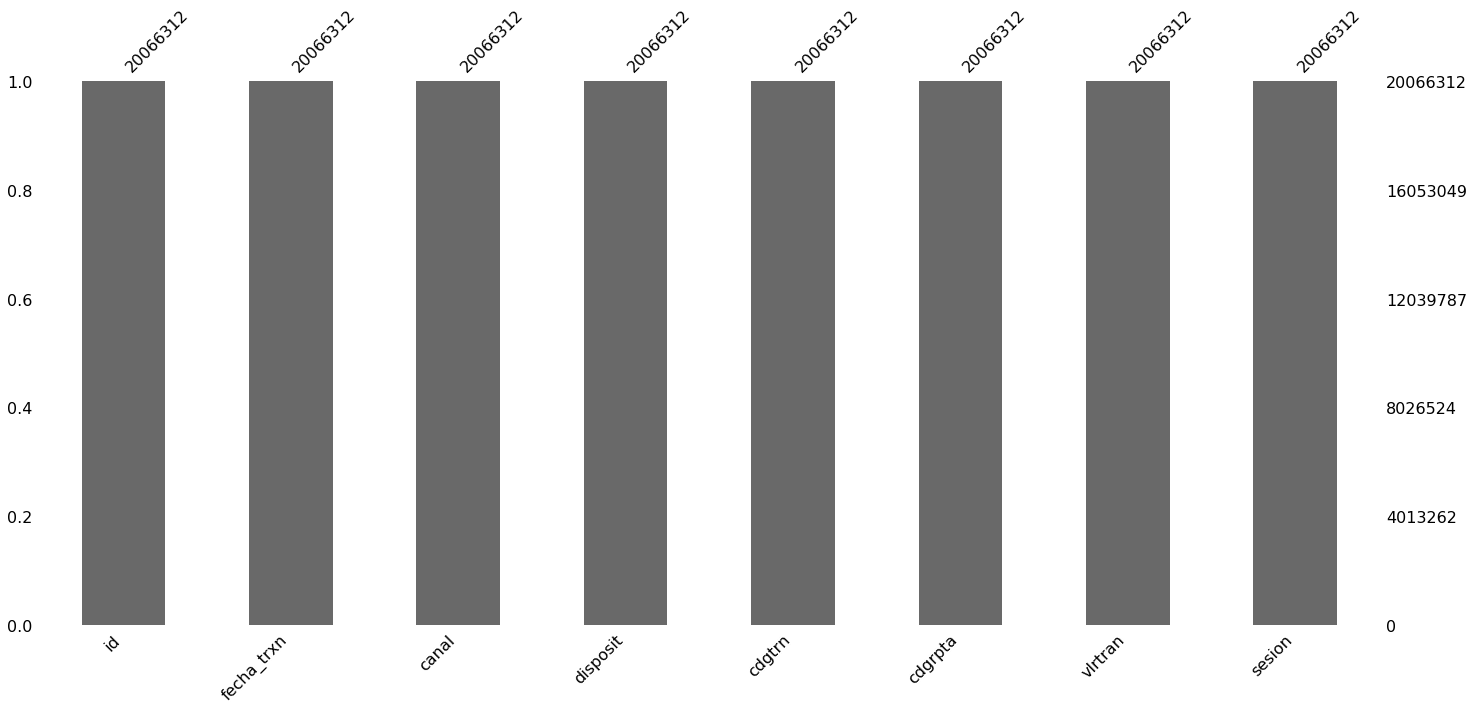

In [5]:
msno.bar(train_trx)


In [6]:
train_trx['year'] = train_trx['fecha_trxn'].dt.year
train_trx['month'] = train_trx['fecha_trxn'].dt.month
train_trx['day'] = train_trx['fecha_trxn'].dt.day
train_trx['hour'] = train_trx['fecha_trxn'].dt.hour
train_trx['minute'] = train_trx['fecha_trxn'].dt.minute
train_trx['second'] = train_trx['fecha_trxn'].dt.second

train_trx.head(3).append(train_trx.tail(3))

,id,fecha_trxn,canal,disposit,cdgtrn,cdgrpta,vlrtran,sesion,year,month,day,hour,minute,second
0,1,2018-02-20 14:16:00.211800,CANAL_5,DISPOSIT_4,464,0,0.0,69,2018,2,20,14,16,0
1,1,2018-02-20 14:16:00.210600,CANAL_5,DISPOSIT_4,360,0,0.0,69,2018,2,20,14,16,0
2,1,2018-02-20 14:16:00.208000,CANAL_5,DISPOSIT_4,491,0,0.0,69,2018,2,20,14,16,0
20066309,38000,2016-03-06 17:18:00.194400,CANAL_2,DISPOSIT_11,9916,0,0.0,2,2016,3,6,17,18,0
20066310,38000,2016-03-06 17:17:00.186700,CANAL_2,DISPOSIT_5,99,0,0.0,2,2016,3,6,17,17,0
20066311,38000,2016-03-06 17:16:00.574700,CANAL_2,DISPOSIT_10,165,0,0.0,1,2016,3,6,17,16,0


In [ ]:
train_trx.drop('fecha_trxn', axis=1, inplace=True)

sample = train_trx.groupby(['year', 'month',
                            'day', 'hour',
                            'minute', 'second',
                            'canal','disposit',
                            'cdgtrn', 'vlrtran', 'sesion'], as_index=False).apply(pd.DataFrame.sample, frac=0.05)

sample.to_csv('sample_train_trxn.csv', sep=';', index=False)

In [ ]:
train_trx = None

categorical_features = ['fecha_trxn', 'canal', 'disposit', 'cdgtrn', 'cdgrpta', 'sesion']
for categorical in categorical_features:
    train_trx[categorical] = pd.Categorical(train_trx[categorical])

In [ ]:
train_trx[categorical_features].describe()